<a href="https://colab.research.google.com/github/karthikamanu123/Capstone-Project-6--ML/blob/main/Machine_Learning_Capstone_Project_By_Karthika_Pradeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insuarance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -** Health Insuarance Cross Sell Prediction


Objective: This project aims to develop a predictive model that will significantly enhance the effectiveness of marketing campaigns for additional vehicle insurance. By accurately identifying customers who are most likely to be interested in these products, the insurance company can optimize resource allocation, improve customer satisfaction, and drive revenue growth.

# **GitHub Link -** https://github.com/karthikamanu123/Capstone-Project-6--ML.git

# **Problem Statement**


This project aims to develop a machine learning model to predict the likelihood of customers purchasing additional vehicle insurance based on their demographic, vehicle, insurance, and interaction data. This model will help the insurance company optimize marketing efforts, improve customer retention, and increase revenue.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Train Test Split
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, recall_score, classification_report, precision_score, f1_score, ConfusionMatrixDisplay




### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
health_insurance_data=pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
health_insurance_data.shape

(381109, 12)

### Dataset First View

In [ ]:
data = health_insurance_data.copy()

In [ ]:
# Dataset First Look
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
count_of_rows= data.shape[0]
count_of_columns= data.shape[1]
print(f"Number_of_rows:{count_of_rows}")
print(f"Number_of_columns:{count_of_columns}")

Number_of_rows:381109
Number_of_columns:12


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
no_of_duplicated_values=data.duplicated().sum()
print(f"Number of duplicaled values:{no_of_duplicated_values}")

Number of duplicaled values:0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


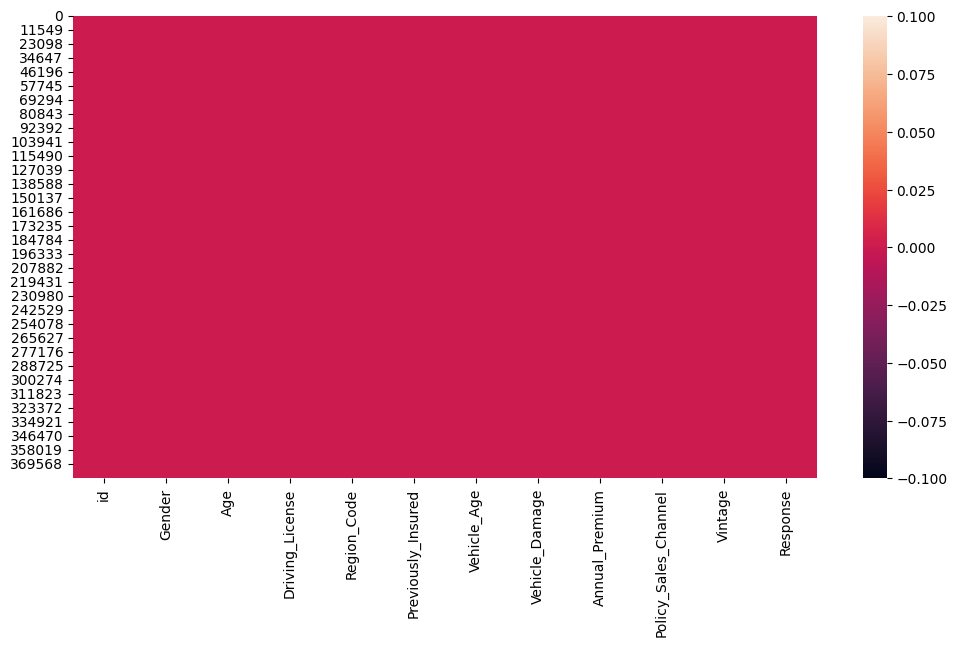

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull())
plt.show()

### What did you know about your dataset?

The dataset comprises 12 features and 381,109 instances, with no missing or duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

**id**: Unique ID for the customer.

**Gender**: Gender of the customer (Male/Female).

**Age**: Age of the customer.

**Driving License**: Indicates if the customer has a driving license (DL) or not.

**Region_Code**: Unique code for the region of the customer.

**Previously_insured**: Whether the customer already has vehicle insurance or not.

**Vehicle_age**: Age of the vehicle.

**Vehicle_damage**: Indicates if the vehicle has past damages or not.

**Annual_premium**: The amount the customer needs to pay as a premium.

**PolicySalesChannel**: Anonymized code for the channel used to reach out to the customer (e.g., Different Agents, Over Mail, Over Phone, In Person, etc.).

**Vintage**: Number of days the customer has been associated with the company.

**Response**: Indicates if the customer is interested or not.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

,0
id,381109
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,48838
Policy_Sales_Channel,155


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Chnage Data Types of column
data['Region_Code'] = data['Region_Code'].astype('str')
data['Policy_Sales_Channel'] = data['Policy_Sales_Channel'].astype('int').astype('str')

In [ ]:
# Separate Numerical and categorical columns from a dataset

Categorical_columns = [column for column in data.columns if data[column].dtype == 'object']
Numerical_columns = [column for column in data.columns if data[column].dtype != 'object']

Continuous_columns = [column for column in Numerical_columns if len(data[column].unique()) > 20]
Discrete_columns = [column for column in Numerical_columns if len(data[column].unique()) < 20]


print(f'Categrical Columns: {Categorical_columns}')
print(f'Numerical Columns: {Numerical_columns}')
print("Continuous Columns:", Continuous_columns)
print("Discrete Columns:", Discrete_columns)

Categrical Columns: ['Gender', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']
Numerical Columns: ['id', 'Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium', 'Vintage', 'Response']
Continuous Columns: ['id', 'Age', 'Annual_Premium', 'Vintage']
Discrete Columns: ['Driving_License', 'Previously_Insured', 'Response']


In [ ]:
# Defining a function called Age so that we can categorize age in to different age groups
def age_range(age):
    """
    Categorize a given age into a descriptive age range.

    Parameters:
    age (int or float): The age to categorize.

    Returns:
    str: A string representing the age range.
         'Young' for ages less than 30,
         'Middle Age' for ages between 30 and 50 (inclusive),
         'Old' for ages greater than 50.
    """
    if age < 30:
        return 'Young'
    elif 30 <= age <= 50:
        return 'Middle Age'
    else:
        return 'Old'

In [ ]:
# creating a new column called Age_Group
data['Age_Group'] = data['Age'].apply(age_range)

In [ ]:
#checking for new column
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age_Group'],
      dtype='object')

In [ ]:
# Create a custom func that takes column as an input and give the basic summary stats
def summary_stats(columns : list, data : pd.DataFrame) -> pd.DataFrame:
  '''
    This function takes a list of column names and a DataFrame as inputs, and returns basic
    statistics for each specified column. Statistics include:
    - Mode
    - Mean
    - Median
    - Standard Deviation
    - Variance
    - First Quartile (Q1)
    - Third Quartile (Q3)
    - Interquartile Range (IQR)
    - Range
    - Outlier Upper Bound
    - Outlier Lower Bound

    Parameters:
    columns (list): List of column names to calculate statistics for.
    data (pd.DataFrame): DataFrame containing the data.

    Returns:
    pd.DataFrame: DataFrame containing the calculated statistics.
    '''
  # Calculate the stats
  stats = {}
  for column in columns:
    if pd.api.types.is_numeric_dtype(data[column]):
      try:
        mean = np.round(data[column].mean(), 2)
      except:
        mean = np.nan
      try:
        std = np.round(data[column].std(), 2)
      except:
        std = np.nan
      try:
        var = np.round(data[column].var(), 2)
      except:
        var = np.nan
    else:
      try:
        mean = data[column].mean()
      except:
        mean = np.nan
      try:
        std = data[column].std()
      except:
        std = np.nan
      try:
        var = data[column].var()
      except:
        var = np.nan

    try:
      q25 = data[column].quantile(0.25)
    except:
      q25 = np.nan
    try:
      median = data[column].median()
    except:
      median = np.nan
    try:
      mode = data[column].mode()[0]
    except:
      mode = np.nan
    try:
      q75 = data[column].quantile(0.75)
    except:
      q75 = np.nan
    try:
      max_val = data[column].max()
    except:
      max_val = np.nan
    try:
      min_val = data[column].min()
    except:
      min_val = np.nan
    try:
      iqr = q75 - q25
    except:
      iqr = np.nan
    try:
      out_upperbound = q75 + 1.5 * iqr
    except:
      out_upperbound = np.nan
    try:
      out_lowerbound = q25 - 1.5 * iqr
    except:
      out_lowerbound = np.nan
    try:
      range_val = max_val - min_val
    except:
      range_val = np.nan

    try:
      percentage_outlier = np.round((data[(data[column] > out_upperbound) | (data[column] < out_lowerbound)].shape[0] / data.shape[0]) * 100, 2)
    except:
      percentage_outlier = np.nan

      # Create a Dict
    stats_dict = {'Mean': mean, 'Median': median,
                  'Std': std, 'Variance':var,
                    "First Quartile":q25, "Third Quartile":q75,
                    "IQR":iqr, "Range":range_val,
                    "Outlier Upper-Bound":out_upperbound,
                    "Outlier Lower-Bound":out_lowerbound,
                    "Percentage Outlier": percentage_outlier}
    stats[column] = stats_dict



  # Create a DataFrame
  stats_df = pd.DataFrame(stats)

  return stats_df.T

In [ ]:
data_summary = summary_stats(Continuous_columns, data)
data_summary

,Mean,Median,Std,Variance,First Quartile,Third Quartile,IQR,Range,Outlier Upper-Bound,Outlier Lower-Bound,Percentage Outlier
id,190555.00,190555.0,110016.84,1.210370e+10,95278.0,285832.0,190554.0,381108.0,571663.0,-190553.0,0.00
Age,38.82,36.0,15.51,2.406100e+02,25.0,49.0,24.0,65.0,85.0,-11.0,0.00
Annual_Premium,30564.39,31669.0,17213.16,2.962927e+08,24405.0,39400.0,14995.0,537535.0,61892.5,1912.5,2.71
Vintage,154.35,154.0,83.67,7.000890e+03,82.0,227.0,145.0,289.0,444.5,-135.5,0.00


From the above data we can see that Annual_Premium column has so many outliers

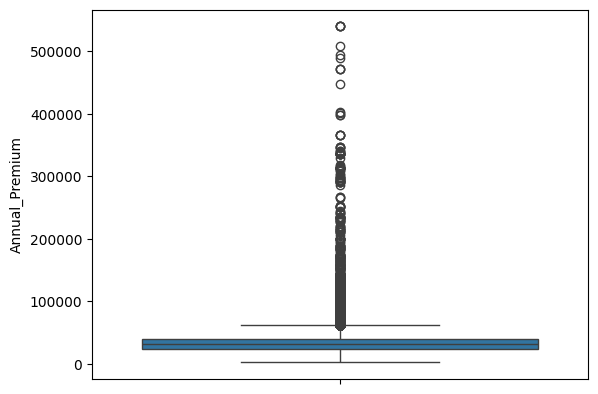

In [ ]:
# Visualization of outliers in Annual_Premium column
sns.boxplot(data['Annual_Premium'])
plt.show()

From the above figure it is clear that,The Annual_Premium column exhibits a highly skewed distribution with a long right tail. This indicates that while most policies have lower premiums, there are a significant number of policies with much higher premiums, likely due to factors like coverage level, vehicle type, or risk profile.

In [ ]:
# IQR Method (Inter Quartile Range Method)
upper_bound =  data_summary.iloc[2, 8]
lower_bound =  data_summary.iloc[2, 9]
outlier_value = data[(data['Annual_Premium'] > upper_bound) | (data['Annual_Premium'] < lower_bound)]['Annual_Premium']
outlier_value

,Annual_Premium
25,61964.0
37,76251.0
67,66338.0
139,62164.0
149,76651.0
...,...
380959,61909.0
380998,101664.0
381035,62889.0
381047,71915.0


In the Annual_Premium column, there are 10320 outliers, accounting for approximately 2.71% of the dataset. While the causes of these outliers could be varied and should be carefully considered before addressing them, for the purposes of this project, we will just drop the outliers as it is just 2.71% of the eniter dataset.



In [ ]:
# filteres the outliers from the dataframe
df = data[(data['Annual_Premium'] < upper_bound) & (data['Annual_Premium'] > lower_bound)]

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26,217,1,Middle Age
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26,183,0,Old
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26,27,1,Middle Age
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152,203,0,Young
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152,39,0,Young


### What all manipulations have you done and insights you found?



*   Cast 'Region Code' and 'Policy Sales Channel' as categorical variables.
*  Categorized customers into age groups: 'Young' (under 30), 'Middle Age' (30-50), and 'Old' (over 50).

*   Implemented a custom function for descriptive analysis.

*   Identified and quantified outliers using the Interquartile Range (IQR) method.

*   Removed outliers in the 'Annual Premium' column, affecting approximately 2.71% of the dataset.








## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

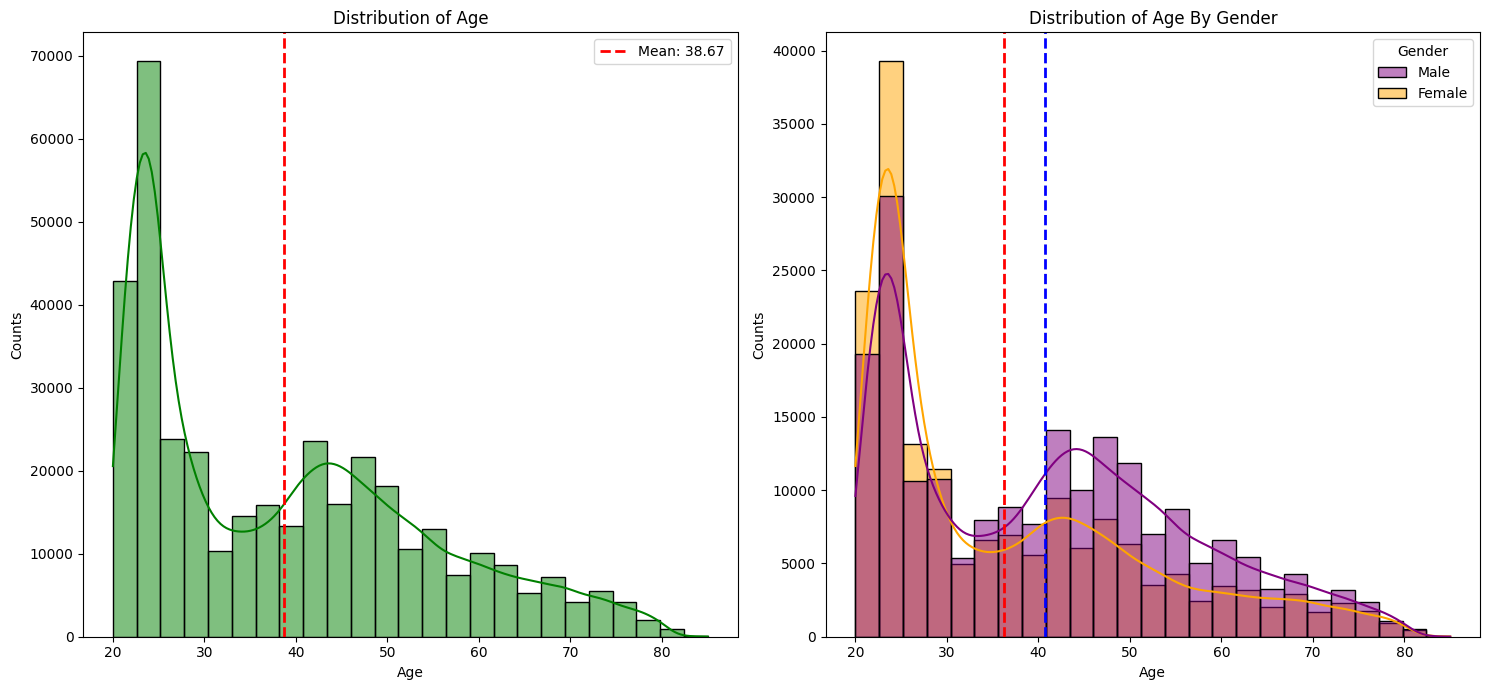

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=25, kde=True, color='g')

mean_age = df['Age'].mean()
# Add a vertical line at the mean
plt.axvline(mean_age, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Distribution of Age')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data = df, x='Age', bins=25, kde=True, hue='Gender',  palette=['purple', 'orange'])

mean_age_male = df[df['Gender'] == 'Male']['Age'].mean()
mean_age_female = df[df['Gender'] == 'Female']['Age'].mean()
plt.axvline(mean_age_male, color='b', linestyle='--', linewidth=2)
plt.axvline(mean_age_female, color='r', linestyle='--', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Distribution of Age By Gender')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The choice of a histogram with a density curve and vertical lines for the mean provides a clear visual representation of the age distribution and its central tendency. This allows for easy comparison and interpretation of the data, both overall and when considering gender differences.

##### 2. What is/are the insight(s) found from the chart?



*   Both the overall age distribution and the distributions for males and females are right-skewed. This means that the majority of individuals in the dataset are younger, with a smaller number of older individuals.
*   The overall mean age is approximately 38.67 years, indicating that the average age of individuals in the dataset is around 38.

*  The mean age for males is slightly higher than the overall mean, around 41 years.

* The mean age for females is lower than the overall mean, around 36 years.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding these age and gender trends, the business can optimize operations, improve customer satisfaction, and drive revenue growth.

#### Chart - 2

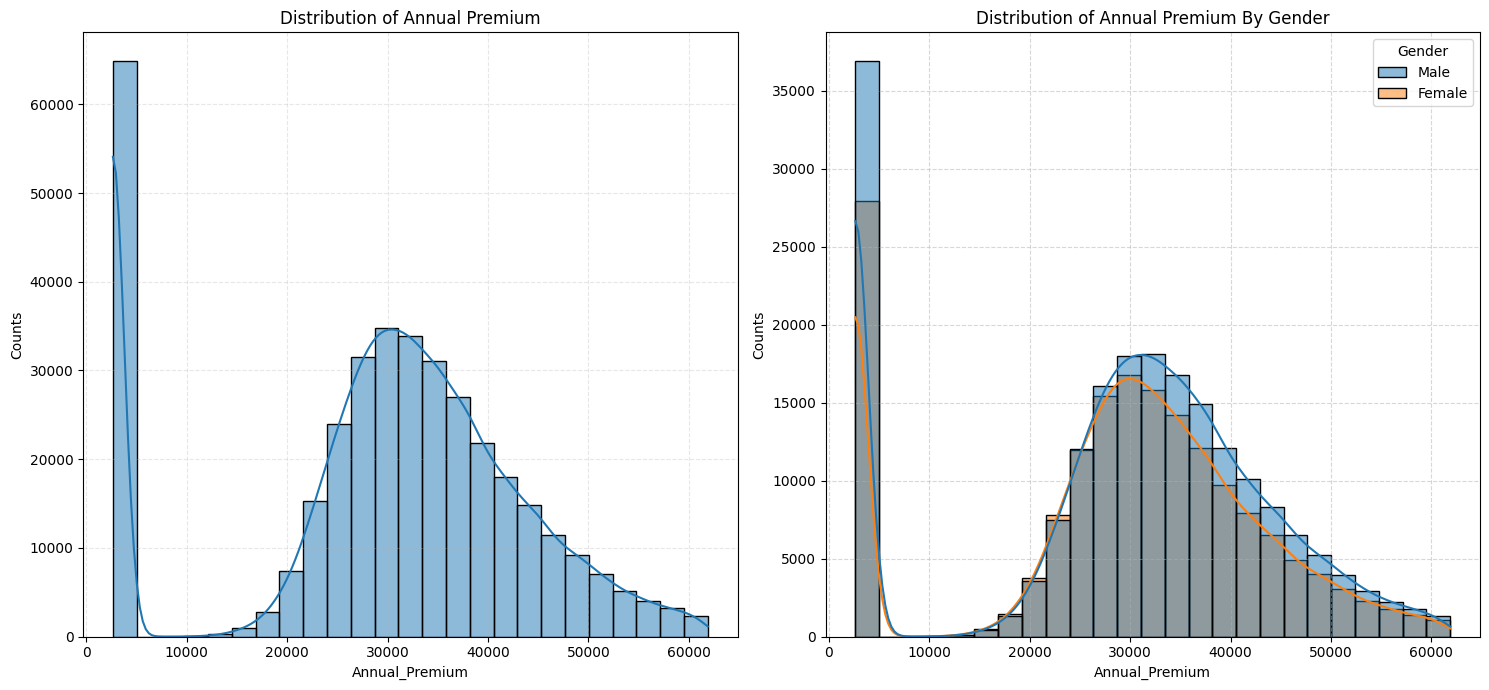

In [ ]:
# Chart - 2 visualization code

plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
sns.histplot(data=df, x='Annual_Premium', bins=25, kde=True)
plt.xlabel('Annual_Premium')
plt.ylabel('Counts')
plt.title('Distribution of Annual Premium')
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(1,2,2)
sns.histplot(data=df, x='Annual_Premium', bins=25, kde=True,  hue='Gender')
plt.xlabel('Annual_Premium')
plt.ylabel('Counts')
plt.title('Distribution of Annual Premium By Gender')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The histograms with density curves provide a clear visual representation of the distribution of annual premiums. This allows for easy comparison and interpretation of the data, both overall and when considering gender differences.

##### 2. What is/are the insight(s) found from the chart?



*   Both the overall distribution and the gender-specific distributions exhibit a right-skewed pattern. This indicates that a majority of policies have lower annual premiums, while a smaller portion of policies have significantly higher premiums.
*   The overall shape and spread of the distributions for males and females appear to be quite similar. This suggests that the factors influencing annual premiums might not be significantly different between genders.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, the insights gained from the chart can significantly contribute to positive business impact.Some of the positive impacts are:


*   We can Optimize Pricing Strategies
*   Improve Customer Segmentation

*  Enhance Customer Satisfaction







#### Chart - 3

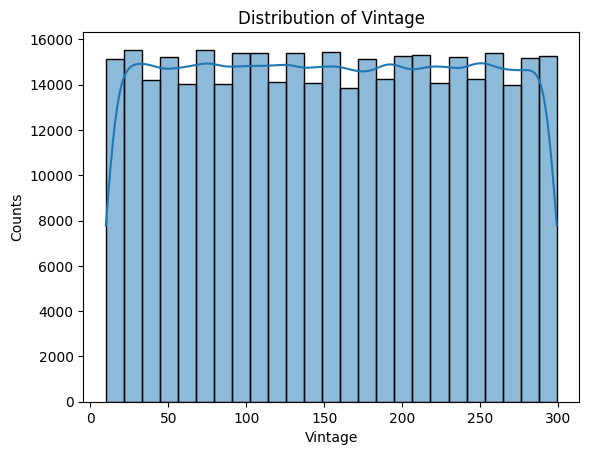

In [ ]:
# Chart - 3 visualization code
sns.histplot(data=df, x='Vintage', kde=True, bins=25)
plt.xlabel('Vintage')
plt.ylabel('Counts')
plt.title('Distribution of Vintage')
plt.show()


##### 1. Why did you pick the specific chart?

 The histogram with a density curve provides a comprehensive and informative visualization of the "Vintage" variable, making it a valuable tool for data exploration and analysis.Also it provides a clear visual representation of the frequency distribution of the data.

##### 2. What is/are the insight(s) found from the chart?



*   The distribution of "Vintage" appears to be relatively uniform, indicating that there is no significant bias towards any particular value. This suggests that the data is evenly distributed across the range.

  



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart can definitely help create a positive business impact.Some of them are;


*   By analyzing vintage, businesses can segment customers based on their tenure and tailor marketing campaigns accordingly.




#### Chart - 4

In [ ]:
# Count the occurrences of each gender in the 'Gender' column of the DataFrame 'df'
gender_count = df['Gender'].value_counts().reset_index()

# Rename the columns of the resulting DataFrame for clarity
gender_count.columns = ['Gender', 'Count']

# Display the DataFrame containing the gender counts
print(gender_count)


   Gender   Count
0    Male  200319
1  Female  170470


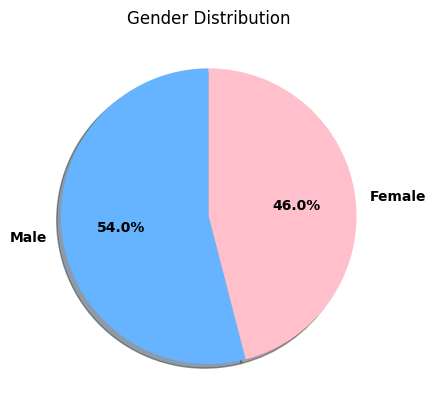

In [ ]:
# Chart - 4 visualization code
plt.pie(gender_count['Count'], labels=gender_count['Gender'], autopct='%1.1f%%', startangle=90, shadow=True,
        colors= ['#66b3ff','#FFC0CB'],
        textprops={'fontweight':'bold'})
plt.title('Gender Distribution')
plt.show()



##### 1. Why did you pick the specific chart?

The pie chart illustrates the gender distribution, revealing a slight male predominance. Males constitute 54% of the total, while females account for 46%.

##### 2. What is/are the insight(s) found from the chart?

Main insights from the chrt are;


*   The gender distribution shows that males constitute a larger portion (54.0%) compared to females (46.0%) in the dataset.


  



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the pie chart can definitely help create a positive business impact.Some of the posiive insights are:


*  By understanding the gender distribution, businesses can tailor marketing campaigns to specific demographics.
*  Businesses can develop products or services that cater to the specific needs and preferences of each gender.



#### Chart - 5

In [ ]:
# Calculate the average annual premium for each gender group in the DataFrame 'df'
gender_annual = df.groupby(['Gender'])['Annual_Premium'].mean().reset_index()
print(gender_annual)

   Gender  Annual_Premium
0  Female    29240.044242
1    Male    29285.578163


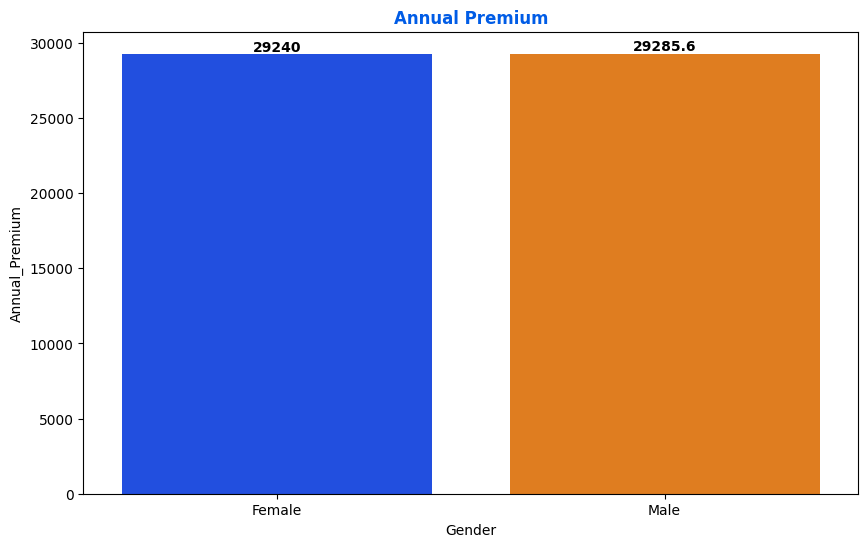

In [ ]:
# Chart - 5 visualization code

# Create the figure and axes

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x=gender_annual['Gender'], y=gender_annual['Annual_Premium'],  hue=gender_annual['Gender'], palette = 'bright',ax=ax)
ax.set_title('Annual Premium',color='#005ce6', fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,color='black', fontweight='bold')


##### 1. Why did you pick the specific chart?

A bar chart is the most appropriate choice for visualizing the annual premium by gender as it provides a clear and concise comparison of the average values for each category.

##### 2. What is/are the insight(s) found from the chart?

Based on the bar chart, we can observe the following key insights:


*   The chart indicates that there is a negligible difference between the average annual premium for males and females.
*   The data suggests that there is no significant gender-based pricing difference in the insurance premiums. Both genders seem to be charged similar rates, on average.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart can definitely help create a positive business impact.Some of them are:


*   By recognizing that there's no significant difference in average annual premiums between genders, insurance companies can ensure fair pricing practices.
*   This can enhance customer trust and loyalty by demonstrating a commitment to equitable pricing

*   By understanding customer preferences and behaviors, regardless of gender, companies can offer personalized products and services.






#### Chart - 6

In [ ]:
# Calculate the average annual premium for each vehicle age group in the DataFrame 'df'

vehical_age_premium = df.groupby(['Vehicle_Age'])['Annual_Premium'].mean().reset_index()
print(vehical_age_premium)

  Vehicle_Age  Annual_Premium
0    1-2 Year    29052.821546
1    < 1 Year    29162.073867
2   > 2 Years    33104.188224


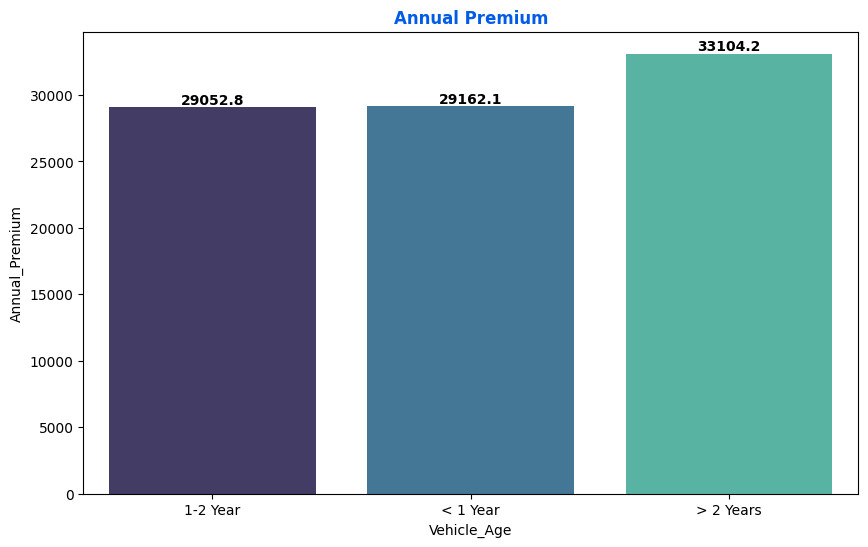

In [ ]:
# Chart - 6 visualization code
# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x=vehical_age_premium['Vehicle_Age'], y=vehical_age_premium['Annual_Premium'],  hue=vehical_age_premium['Vehicle_Age'], palette = 'mako',ax=ax)
ax.set_title('Annual Premium',color='#005ce6', fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,color='black', fontweight='bold')


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the annual premium by vehicle age because it's an effective way to compare discrete categories (vehicle age groups) and their corresponding numerical values (annual premium)

##### 2. What is/are the insight(s) found from the chart?

By analyzing the bar chart, we can identify the following key insights:

*   The chart clearly demonstrates that the average annual premium varies significantly based on the vehicle's age.
*  As the vehicle age increases, the average annual premium tends to rise. This suggests that older vehicles are generally associated with higher insurance costs.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can significantly contribute to a positive business impact for an insurance company.

Some of the insights are:


*   By understanding the correlation between vehicle age and risk, insurance companies can implement more accurate risk-based pricing models.
*   Insurance companies can develop specialized insurance products that cater to the specific needs of owners of older or newer vehicles.

*   By understanding the unique needs of different age groups, companies can deliver personalized messages and improve customer engagement.







#### Chart - 7

In [ ]:
# Count the occurrences of each response category (0 and 1) in the 'Response' column
response_count = df['Response'].value_counts().reset_index()
response_count.columns = ['Response', 'Count']
response_count['Response'] = response_count['Response'].map({0:'Not Intrested', 1:'Intrested'})
response_count

,Response,Count
0,Not Intrested,325634
1,Intrested,45155


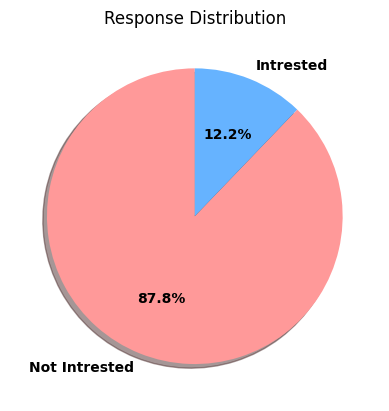

In [ ]:
# Chart - 7 visualization code
plt.pie(response_count['Count'], labels=response_count['Response'], autopct='%1.1f%%', startangle=90, shadow=True,
        colors=['#ff9999','#66b3ff'],
        textprops={'fontweight':'bold'})
plt.title('Response Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a pie chart to visualize the response distribution because it is an effective way to show the proportion of each category (interested and not interested) relative to the total.

##### 2. What is/are the insight(s) found from the chart?

Main insights are:


*  The pie chart reveals that only a small percentage (12.2%) of individuals expressed interest in the product or service.
*   The majority of respondents (87.8%) showed disinterest, indicating a significant lack of appeal or relevance.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the pie chart can definitely help create a positive business impact.Some of the positive impacts are:

*   By understanding the reasons for disinterest, businesses can identify specific shortcomings in their offerings
*   This enables them to make necessary improvements to increase appeal and meet customer needs.




#### Chart - 8

<ipython-input-37-5f22d4346884>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='Annual_Premium', palette='mako')
<ipython-input-37-5f22d4346884>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Vehicle_Age', y='Annual_Premium', palette='mako')
<ipython-input-37-5f22d4346884>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Vehicle_Damage', y='Annual_Premium', palette='mako')


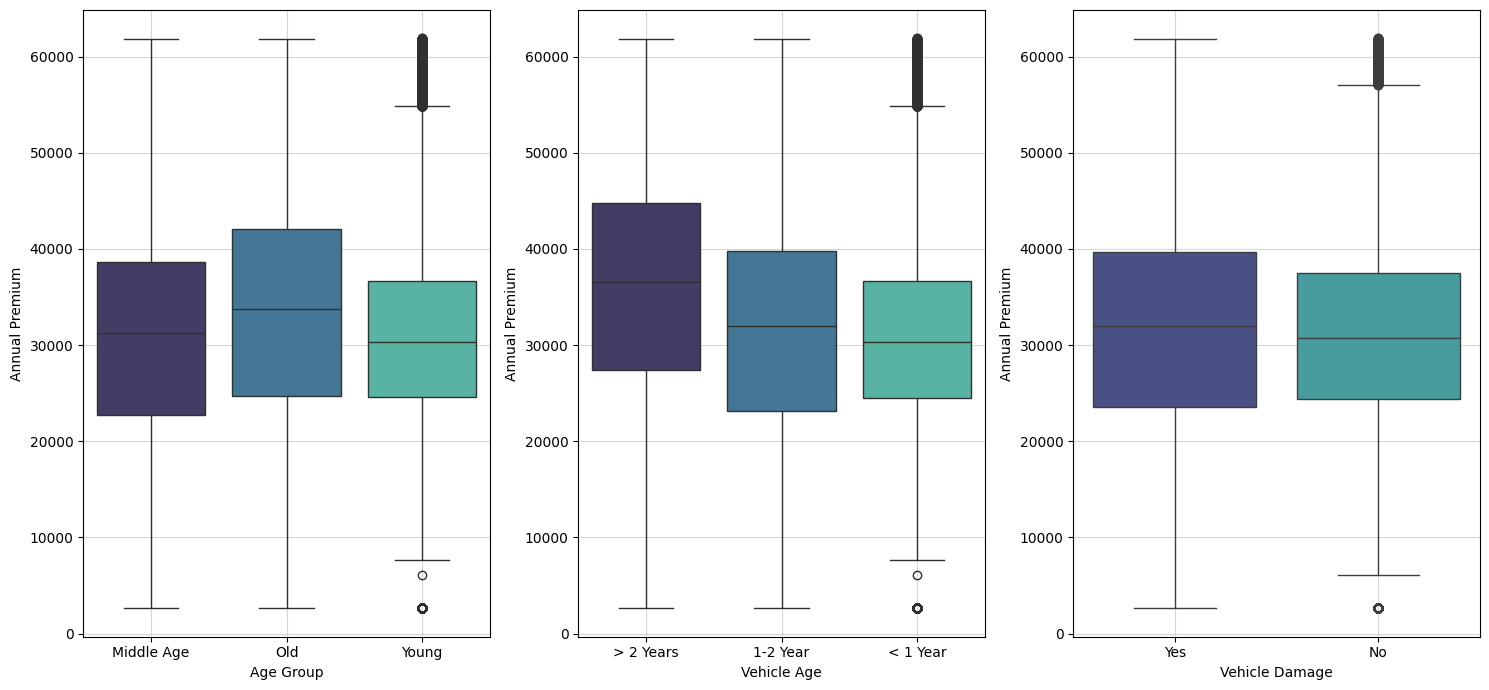

In [ ]:
# Chart - 8 visualization code
# Set up the figure size
plt.figure(figsize=(15, 7))

# Plot 1: Gender vs Annual Premium
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Age_Group', y='Annual_Premium', palette='mako')
plt.xlabel('Age Group')
plt.ylabel('Annual Premium')
plt.grid(True, alpha=0.5)  # Add grid with alpha

# Plot 2: Vehicle Age vs Annual Premium
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Vehicle_Age', y='Annual_Premium', palette='mako')
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
plt.grid(True, alpha=0.5)  # Add grid with alpha

# Plot 3: Vehicle Damage vs Annual Premium
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Vehicle_Damage', y='Annual_Premium', palette='mako')
plt.xlabel('Vehicle Damage')
plt.ylabel('Annual Premium')
plt.grid(True, alpha=0.5)  # Add grid with alpha

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


##### 1. Why did you pick the specific chart?

Boxplots are an excellent choice for visualizing the distribution of numerical data, especially when you want to compare multiple groups or categories. Boxplots provide a clear visual summary of the central tendency, spread, and potential outliers for each category, helping to identify trends and variations in premiums across these factors.

##### 2. What is/are the insight(s) found from the chart?

Insights found from the charts are:


*  The annual premium distribution is right-skewed for all categories, indicating that there are a significant number of policies with higher premiums compared to the majority.
*  Older vehicles tend to have higher premiums

*  The whiskers for the "Young" age group are longer than the other two groups, suggesting more variability in premiums for this category.
*   Newer vehicles (< 1 year) have the lowest premiums

*   Vehicles with damage have significantly higher premiums:








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can definitely help create a positive business impact in various ways  they are:


*   Based on vehicle age and damage, the company can implement a tiered pricing strategy to optimize revenue and attract customers.
*  Offer discounts to customers with newer vehicles or those without damage to incentivize them.

*  Identify high-risk segments (older vehicles, vehicles with damage) and adjust premiums accordingly





#### Chart - 9

In [ ]:
# Counts the occurrences of each response within each gender category
gender_response_count = df.groupby('Gender')['Response'].value_counts().reset_index(name='Count')
gender_response_count


,Gender,Response,Count
0,Female,0,152871
1,Female,1,17599
2,Male,0,172763
3,Male,1,27556


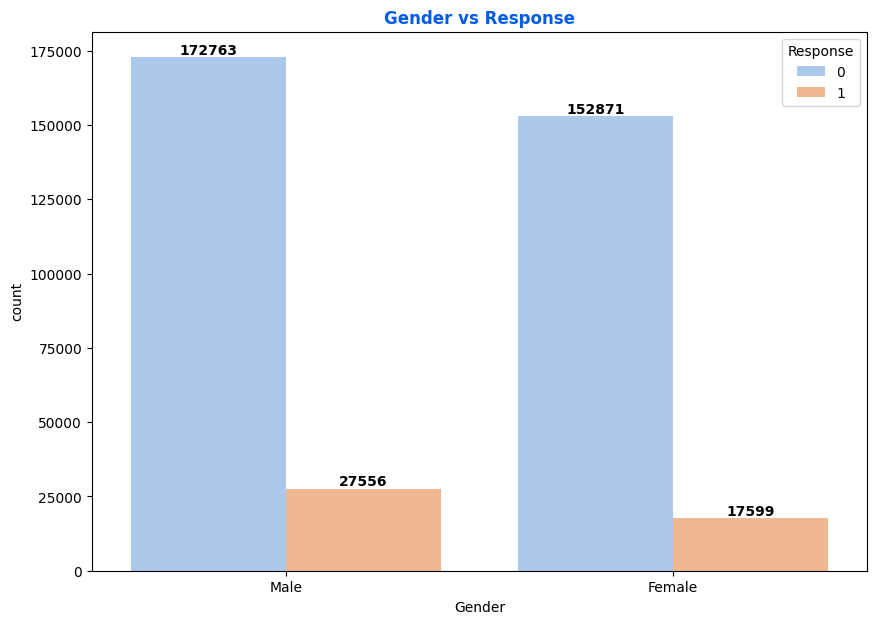

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='Gender', hue='Response', palette='pastel')
ax.set_title('Gender vs Response',color='#005ce6', fontweight='bold')
for container in ax.containers:
    ax.bar_label(container,color='black', fontweight='bold')


##### 1. Why did you pick the specific chart?

The stacked bar chart is a suitable choice for this data as it provides a clear and concise visualization of the response counts by gender and the distribution of responses within each gender group.

##### 2. What is/are the insight(s) found from the chart?

Based on the stacked bar chart, we can observe the following insights:


*   A significantly higher number of males responded compared to females.
*   While the overall response count is lower for females, the distribution of responses between categories 0 and 1 is relatively similar to males

*   Females have a higher count of "Not Interested" responses (152,871) compared to "Interested" responses (17,599).







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can certainly help create a positive business impact.

Here are some positive insights:


*   By understanding the response patterns of different genders, businesses can tailor marketing campaigns to resonate with specific demographics.
*   By understanding how different genders interact with products, businesses can optimize user experience for both groups.

*    By analyzing the data, businesses can predict future trends and potential risks, allowing them to take proactive measures.






#### Chart - 10

In [ ]:
# Calculates the average annual premium for each age group.
age_group_premium = df.groupby('Age_Group')['Annual_Premium'].mean().reset_index()
age_group_premium

,Age_Group,Annual_Premium
0,Middle Age,28364.417802
1,Old,30773.362751
2,Young,29216.222156


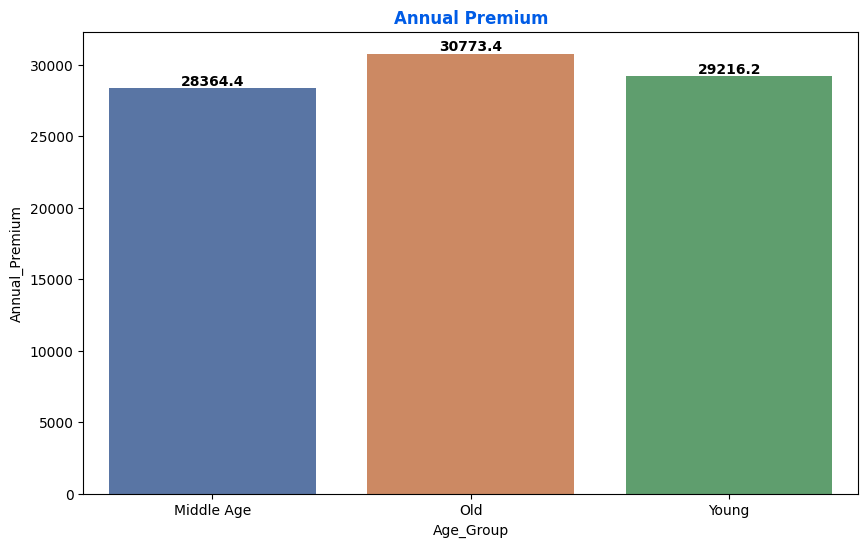

In [ ]:
# Chart - 10 visualization code
# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x=age_group_premium['Age_Group'], y=age_group_premium['Annual_Premium'],  hue=age_group_premium['Age_Group'], palette = 'deep', ax=ax)
ax.set_title('Annual Premium',color='#005ce6', fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,color='black', fontweight='bold')

plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is a simple, effective, and visually appealing way to compare the mean annual premium across different age groups.

##### 2. What is/are the insight(s) found from the chart?

Insights are:


*    The middle age group has the lowest average annual premium compared to other age groups.
*  The old age group has a higher average annual premium compared to the middle age group.

*  The young age group has the highest average annual premium.
*  There seems to be a general trend of increasing annual premium with increasing age.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can definitely help create a positive business impact.Some of them are:


*    Based on age groups, the company can implement a tiered pricing strategy to optimize revenue and attract customers
*  Offer discounts to specific age groups to incentivize them.

*   Create targeted marketing campaigns for different age groups.

*    Offer personalized discounts, promotions, or add-on services to specific age groups.






#### Chart - 11

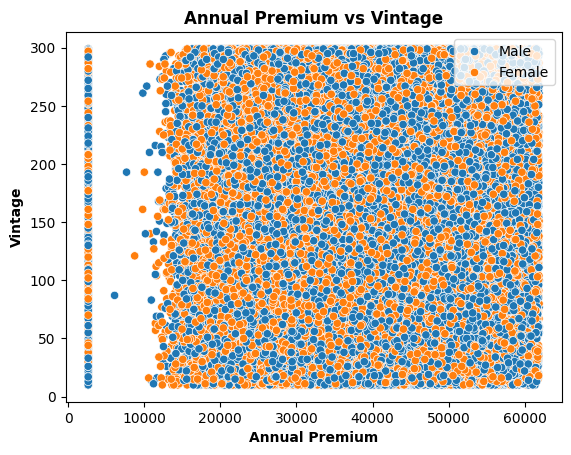

In [ ]:
# Chart - 11 visualization code
# Create a scatter plot of Annual Premium vs Vintage, with points colored by Gender
sns.scatterplot(data=df, y='Vintage', x='Annual_Premium', hue='Gender')

# Set the title of the plot with bold formatting
plt.title('Annual Premium vs Vintage', fontweight='bold')

# Set the x-axis label with bold formatting
plt.xlabel('Annual Premium', fontweight='bold')

# Set the y-axis label with bold formatting
plt.ylabel('Vintage', fontweight='bold')

# Position the legend in the upper right corner
plt.legend(loc='upper right')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is an excellent choice for this dataset because it helps visualize the relationship between two numerical variables they are; Annual Premium and Vintage.

##### 2. What is/are the insight(s) found from the chart?

Based on the scatter plot, we can observe the following insights:

*   There doesn't seem to be a strong linear relationship between the annual premium and vintage.
*  The points are scattered randomly across the plot, indicating that the premium doesn't increase or decrease consistently with the vintage.











##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from the scatter plot can definitely help create a positive business impact.Some of them are:

*   The company can ensure fair pricing by not solely relying on policy vintage to determine premiums.
*   By analyzing other factors like claim history, customer loyalty, and policy add-ons, the company can identify high-value customers and tailor offers to retain them.

*  The company can target specific customer segments with personalized offers based on their needs and preferences.







#### Chart - 12

In [ ]:
# Groups the data by 'Region_Code' and calculates the count of IDs and mean annual premium for each group.
# Sorts the groups by the count of IDs in descending order and selects the top 10 regions.
top_10_region = df.groupby('Region_Code').agg({'id': 'count', 'Annual_Premium': 'mean'}).sort_values(by='id', ascending=False)[:10]
top_10_region.columns = ['Count', 'Annual_Premium']
top_10_region

,Count,Annual_Premium
Region_Code,,
28.0,99741,36066.915692
8.0,32069,34320.094047
46.0,19628,26916.126197
41.0,17941,30054.958809
15.0,13178,29151.256640
30.0,12179,25437.393628
29.0,10871,28506.065311
50.0,10188,30688.413231
3.0,9172,24058.187636


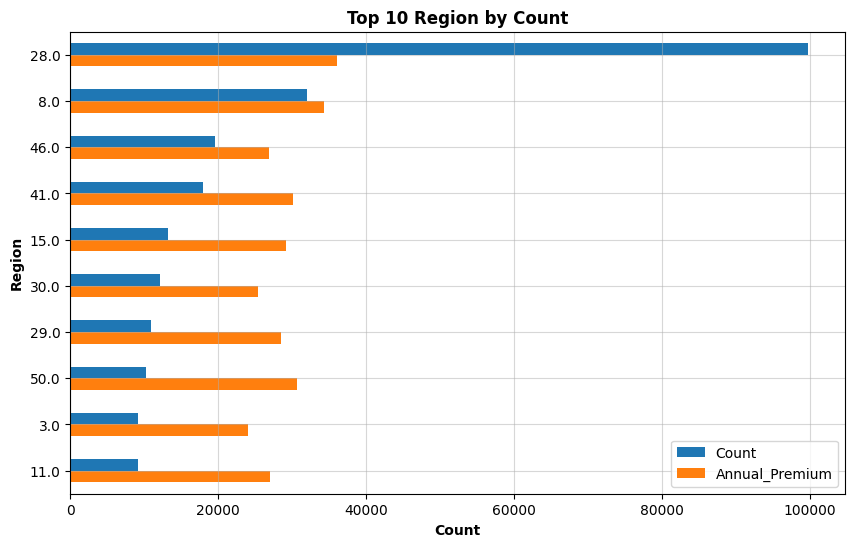

In [ ]:
# Chart - 12 visualization code
# Create a horizontal bar plot
top_10_region.plot(kind='barh', figsize=(10, 6))

# Set the x-axis label with bold formatting
plt.xlabel('Count', fontweight='bold')

# Set the y-axis label with bold formatting
plt.ylabel('Region', fontweight='bold')

# Set the title of the plot with bold formatting
plt.title('Top 10 Region by Count', fontweight='bold')

plt.grid(True, alpha=0.5)  # Add grid with alpha

plt.gca().invert_yaxis()  # Invert the y-axis to display the highest count at the top

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is a visually effective way to compare and rank the top 10 regions based on the number of policies and their average annual premiums.

##### 2. What is/are the insight(s) found from the chart?

Based on the horizontal bar chart, we can observe the following insights:


*   Region 28.0 has the highest number of policies, indicating it's a significant market for the insurance company.
*   The number of policies varies significantly across different regions, suggesting varying market penetration and customer base.

*   The average annual premium varies across regions. Some regions have higher average premiums, while others have lower ones.
*   Factors like demographics, economic conditions, and risk profiles of customers in different regions might influence the average premium.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can definitely help create a positive business impact.Some of them are:


*    By understanding the average premium and customer base in each region, the company can offer personalized deals and promotions.
*   The company can allocate resources, such as sales and support teams, to regions with higher potential and growth opportunities.

*    The company can tailor marketing campaigns to specific regions based on their unique characteristics.





#### Chart - 13

In [ ]:
# Groups the data by 'Policy_Sales_Channel' and calculates the count of IDs and mean annual premium for each channel
top_10_policy_channel = df.groupby('Policy_Sales_Channel').agg({'id': 'count', 'Annual_Premium': 'mean'}).sort_values(by='id', ascending=False)[:10]
top_10_policy_channel.columns = ['Count', 'Annual_Premium']
top_10_policy_channel

,Count,Annual_Premium
Policy_Sales_Channel,,
152,132168,29956.164979
26,76375,31779.980504
124,71902,30385.821813
160,21489,24885.498767
156,10591,10878.777547
122,9306,34114.655921
157,6640,13517.114006
154,5890,27330.832428
151,3810,28416.700525


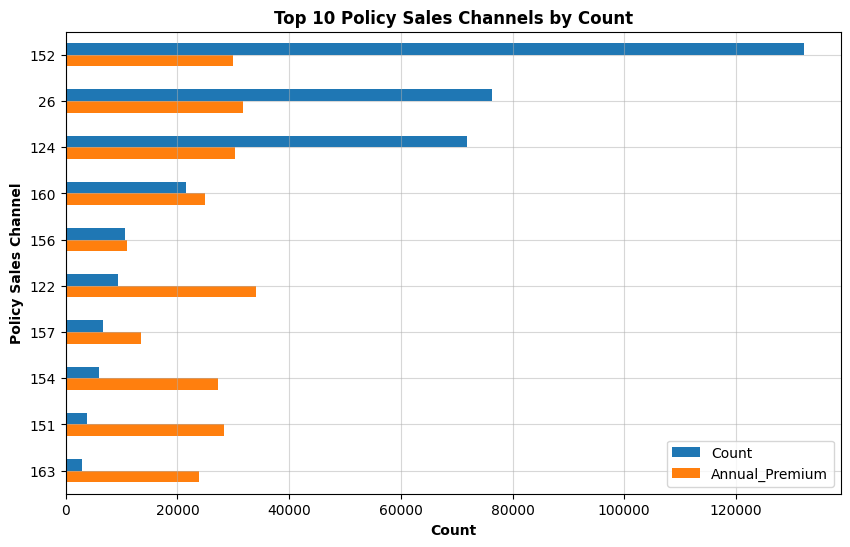

In [ ]:
# Chart - 13 visualization code
# Create a horizontal bar plot for Policy Sales Channel
top_10_policy_channel.plot(kind='barh', figsize=(10, 6))

# Set the x-axis label with bold formatting
plt.xlabel('Count', fontweight='bold')

# Set the y-axis label with bold formatting
plt.ylabel('Policy Sales Channel', fontweight='bold')

# Set the title of the plot with bold formatting
plt.title('Top 10 Policy Sales Channels by Count', fontweight='bold')

plt.grid(True, alpha=0.5)  # Add grid with alpha

plt.gca().invert_yaxis()  # Invert the y-axis to display the highest count at the top

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is a visually effective way to compare and rank the top 10 policy sales channels based on the number of policies sold and their average annual premiums.

##### 2. What is/are the insight(s) found from the chart?

Based on the horizontal bar chart, we can observe the following insights:


*  Channels 152 and 26 have the highest number of policies sold, indicating they are the most effective channels.
*  The number of policies sold varies significantly across different channels, suggesting varying effectiveness and market penetration.

*   The average annual premium varies across different channels. Some channels have higher average premiums, while others have lower ones.
*   Factors like the target customer segment, product mix, and sales strategy of each channel might influence the average premium




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can definitely help create a positive business impact.Some of them are:


*    Identify underperforming channels and analyze the reasons for their low performance. Implement strategies to improve their effectiveness.
*   Develop new products or services that cater to the specific needs of customers in different channels

*   Analyze customer behavior and preferences across different channels to identify high-value segments.

Negative impacts:


*   Neglecting underperforming channels might lead to missed opportunities and reduced market share.
*   Continuously explore and evaluate new sales channels to reduce dependence on a few top performers.

*    Regularly monitor the performance of all sales channels and make necessary adjustments.








#### Chart - 14 - Correlation Heatmap

In [ ]:
# Select the specified columns from the DataFrame.
# Calculating the correlation matrix between the selected columns
columns = ['Age', 'Annual_Premium', 'Vintage']
df_corr = df[columns].corr()
df_corr

,Age,Annual_Premium,Vintage
Age,1.000000,0.050669,-0.001644
Annual_Premium,0.050669,1.000000,-0.000884
Vintage,-0.001644,-0.000884,1.000000


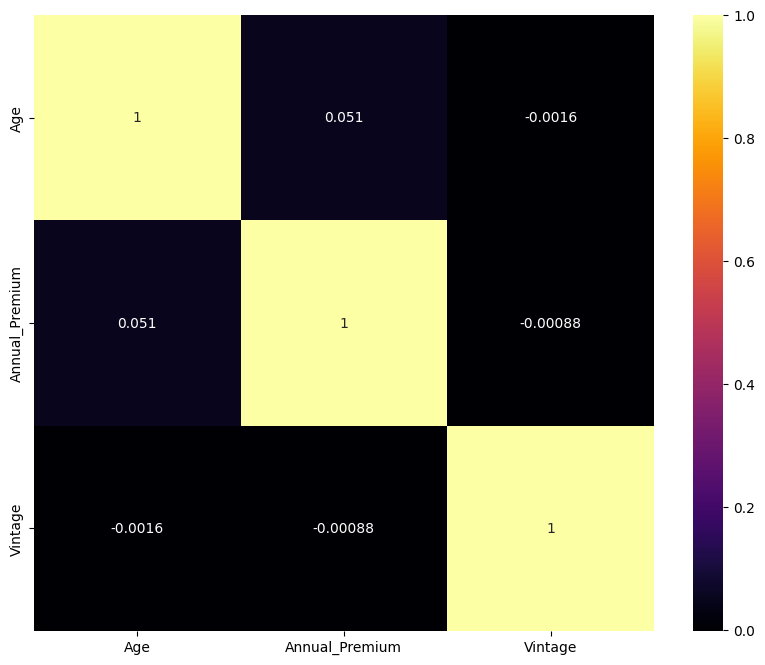

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 8))
colormap = 'inferno'
sns.heatmap(df_corr, annot=True, cmap=colormap)
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is an excellent choice for visualizing the correlation matrix between numerical variables because it provides a clear and concise representation of the relationships between each pair of variables.

##### 2. What is/are the insight(s) found from the chart?

Based on the heatmap, we can observe the following insights:

*  There are no strong correlations between the variables 'Age', 'Annual Premium', and 'Vintage'.
*   The correlation coefficients are close to zero, indicating a weak or negligible linear relationship between the variables.



#### Chart - 15 - Pair Plot

In [ ]:
#selecting specific columns
columns = ['Age', 'Annual_Premium', 'Vintage', 'Gender']

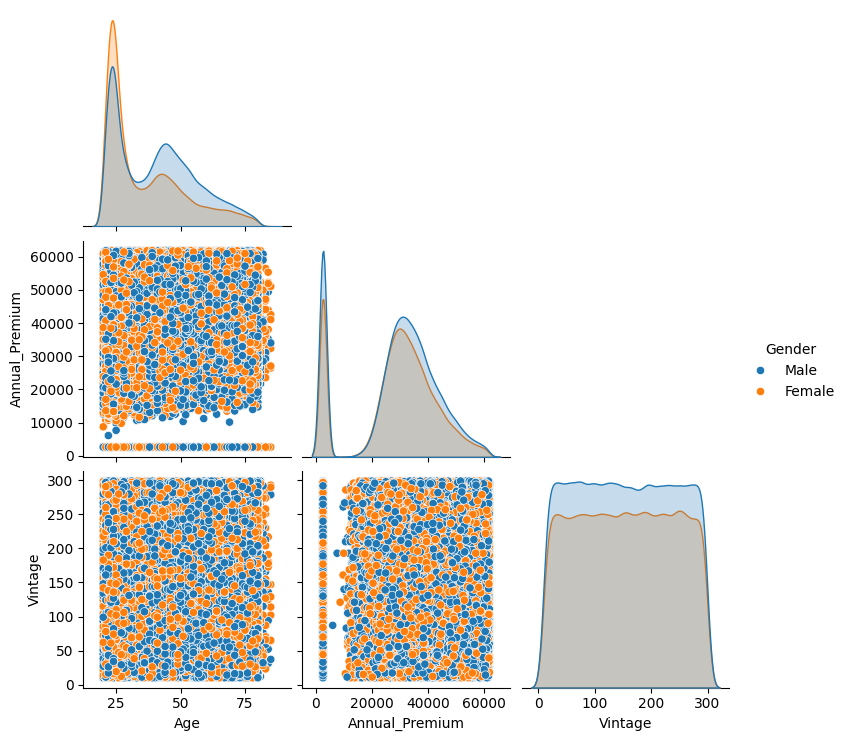

In [ ]:
# Pair Plot visualization code
sns.pairplot(df[columns], hue = 'Gender', corner=True)
plt.show()


##### 1. Why did you pick the specific chart?

A pairplot is an excellent choice for visualizing the relationships between multiple numerical variables, especially when you want to explore potential correlations and distributions.

##### 2. What is/are the insight(s) found from the chart?

Based on the pairplot, we can observe the following insights:

*   There is no strong linear relationship between the variables 'Annual Premium' and 'Vintage'. The scatter plots show a random distribution of points, indicating a weak correlation.
*   The distribution of 'Annual Premium' is right-skewed, indicating that most policies have lower premiums, with a few policies having significantly higher premiums



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



*   The dataset's average age is 35 years old.
*   The dataset shows an average annual premium exceeding $25,000.

*   The dataset contains an equal number of male and female individuals.





### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

From the distribution of Age column is it clear that the mean age is 40 Let's use hypothesis testing to see if this statement is true.

**Null Hypothesis** H₀= μ =40

**Alternate Hypothesis**  Hₐ= μ ≠ 40

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(df['Age'], 40)
# Print results
print("T-Statistic:", t_statistic)
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The mean age is not equal to 40.")
else:
    print("Fail to reject the null hypothesis. The mean age is equal to 40.")

T-Statistic: -52.43857786655832
P-Value: 0.0
Reject the null hypothesis. The mean age is not equal to 40.


##### Which statistical test have you done to obtain P-Value?

To determine statistical significance, a one-sample t-test was conducted. The t-test was chosen as the population standard deviation was unknown.

##### Why did you choose the specific statistical test?

**Test Justification:**The one-sample t-test was selected to test the hypothesis that the population mean age is equal to 40. This test is appropriate as it allows us to compare a sample mean to a known or hypothesized population mean, especially when the population standard deviation is unknown.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Averge Annual Premium Plan is less than 30000. Let's Check this Hypothesis.

**Null Hypothesis** H₀= μ <= 30000

**Alternate Hypothesis**  Hₐ= μ > 30000

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(df['Annual_Premium'], 30000)

# For a one-tailed test, we consider the p-value for the right tail
one_tailed_p_value = p_value / 2 if t_statistic > 0 else 1 - (p_value / 2)

# Print results
print("T-Statistic:", t_statistic)
print(f"P-Value: {one_tailed_p_value}")

alpha = 0.05
if one_tailed_p_value < alpha:
    print("Reject the null hypothesis. The mean annual premium is greater than 30000.")
else:
    print("Fail to reject the null hypothesis. The mean annual premium is not greater than 30000.")

T-Statistic: -30.372010599528775
P-Value: 1.0
Fail to reject the null hypothesis. The mean annual premium is not greater than 30000.


##### Which statistical test have you done to obtain P-Value?

A one-tailed t-test was used to calculate the p-value.



##### Why did you choose the specific statistical test?

**Test Justification:**The one-sample t-test was selected to test the hypothesis that the population mean annual premium is equal to 30,000. This test is appropriate as it allows us to compare a sample mean to a known or hypothesized population mean, especially when the population standard deviation is unknown. Given that we are interested in determining if the mean annual premium is significantly different from 30,000 in one direction, a one-tailed t-test was used.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Let's check if the proportion of males and females is equal, i.e., 50%.

Null Hypothesis: H₀= p = 0.5

Statement: The proportion of males in the population is equal to 50%.

Alternative Hypothesis: Hₐ= p ≠ 0.5

Statement: The proportion of males in the population is not equal to 50%.

#### 2. Perform an appropriate statistical test.

The formula for the z-score is given by:

**z = (p̂ - p₀) / √(p₀(1-p₀)/n)**

Where:
p̂= Observed proportion of Males
p₀= Expected proportion (e.g., 0.5 for a 50-50 split)
n= Total no:of observations


In [ ]:

# Import necessary library for statistical functions
from scipy import stats

# Count the number of occurrences of each gender and reset index to make it a DataFrame
gender_count = df['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']

# Calculate the proportion of each gender
gender_count['Proportion'] = gender_count['Count'] / gender_count['Count'].sum()
print(gender_count)
print('\n')

# Extract the observed proportion of males
p_hat = gender_count['Proportion'][0]

# Define the null hypothesis proportion (e.g., 50% for a balanced split)
p_0 = 0.5

# Calculate the total number of observations
n = gender_count['Count'].sum()

# Compute the test statistic (z-score) for the observed proportion
z_stat = (p_hat - p_0) / ( (p_0 * (1 - p_0) / n) ** 0.5 )

# Calculate the p-value from the z-statistic
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Print the test statistic and p-value
print("Z-Statistic:", z_stat)
print(f"P-Value: {p_value}")

# Define the significance level
alpha = 0.05

# Compare p-value with alpha to determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. The proportion of males is not equal to 50%.")
else:
    print("Fail to reject the null hypothesis. The proportion of males is equal to 50%.")

   Gender   Count  Proportion
0    Male  200319    0.540251
1  Female  170470    0.459749


Z-Statistic: 49.019216470540414
P-Value: 0.0
Reject the null hypothesis. The proportion of males is not equal to 50%.


##### Which statistical test have you done to obtain P-Value?

The test conducted is a one-sample z-test for proportions to determine if the observed proportion differs significantly from the expected proportion

##### Why did you choose the specific statistical test?

The one-sample z-test for proportions was chosen because it assesses whether the observed proportion in a sample significantly differs from a known or hypothesized population proportion, which is suitable for large sample sizes.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Handling Missing Values & Missing Value Imputation
# we will use our original dataset
health_insurance_data.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:

# Checking for missing value
health_insurance_data.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

In the dataset, there are no null values present. However, if null values were to exist, appropriate imputation techniques could be applied based on the distribution and type of data:


*   Numerical Data:

Normal Distribution: Mean imputation would be suitable to replace missing values.
Skewed Distribution: Median imputation would be more appropriate to handle skewness.


*  Categorical Data:

Mode Imputation: The most frequent value (mode) would be used to replace missing categorical data.
These imputations can be implemented using either Pandas or Scikit-learn:

Using Pandas:
data.fillna(value)
- Using Scikit-learn:
from sklearn.impute import SimpleImputer imputer = SimpleImputer(strategy='mean')




### 2. Handling Outliers

From Our Exploratory Data Analysis, we know that Annual_Premium has
2.71% of outlier values.

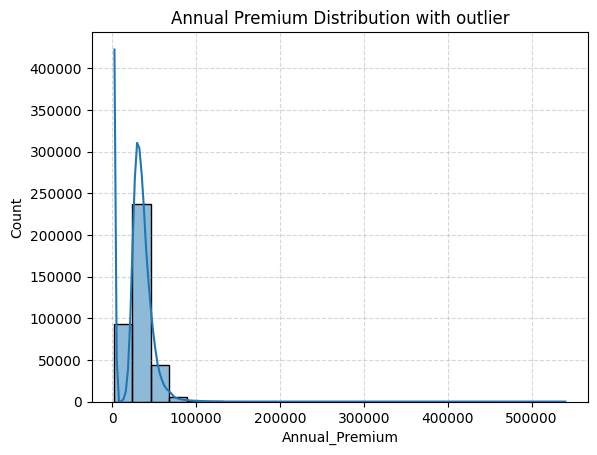

In [ ]:
# Handling Outliers & Outlier treatments
sns.histplot(data=health_insurance_data, x='Annual_Premium', bins=25, kde=True)
plt.title('Annual Premium Distribution with outlier')
plt.grid(True, linestyle='--', alpha = 0.5)
plt.show()

In [ ]:

# Using IQR to Identify the outliers
Q1 = health_insurance_data['Annual_Premium'].quantile(0.25)
Q3 = health_insurance_data['Annual_Premium'].quantile(0.75)
# Calculate IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = health_insurance_data[(health_insurance_data['Annual_Premium'] < lower_bound) | (health_insurance_data['Annual_Premium'] > upper_bound)]

# Number of outliers
num_outliers = outliers.shape[0]

print(f"Number of Outliers: {num_outliers}")


Number of Outliers: 10320


In [ ]:

# Clip the outliers to the lower and upper bounds
health_insurance_data['Annual_Premium'] = health_insurance_data['Annual_Premium'].clip(lower=lower_bound, upper=upper_bound)



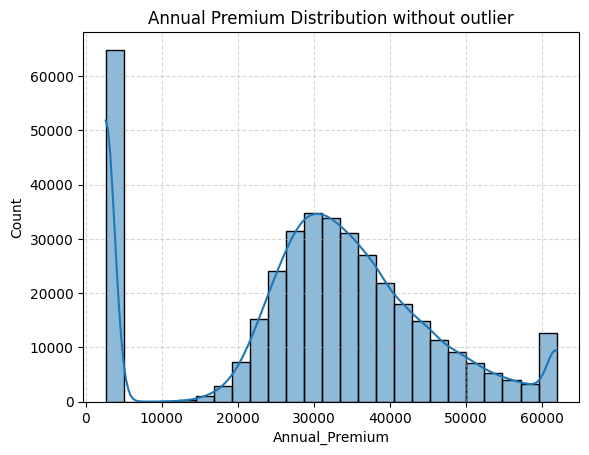

In [ ]:

# Handling Outliers & Outlier treatments
sns.histplot(data=health_insurance_data, x='Annual_Premium', bins=25, kde=True)
plt.title('Annual Premium Distribution without outlier')
plt.grid(True, linestyle='--', alpha = 0.5)
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Observation**: Our dataset contains 10320 outliers, representing about 2.71% of the total data. To handle these outliers, we've employed a clipping technique, which caps extreme values within a defined range to preserve data integrity.
It's important to note that outlier treatment strategies vary depending on the specific context and the underlying causes of the outliers. While clipping was used in this case, alternative methods like winsorizing (capping extreme values at a certain percentile) or imputation (replacing outliers with estimated values) could be considered in different scenarios.

# 4. Textual Data Preprocessing

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Here we don't use any Textual data preprocessing this is because in health insurance cross-sell prediction, the dataset usually consists of structured numerical data such as age, gender, annual premium, vehicle age, etc. These are straightforward features that can be directly fed into machine learning models without extensive text preprocessing

#### 1. Expand Contraction

In [ ]:
#  Expand Contraction

#### 2. Lower Casting

In [ ]:
# Lower Casting

#### 3. Removing Punctuations

In [ ]:
# Removing Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

5. Removing Stopwords & Removing White spaces

In [ ]:
## Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
#  Rephrase Text

#### 7. Tokenization

In [ ]:
#  Tokenization

#### 8. Text Normalization

In [ ]:
# # Normalizing Text (i.e., Stemming, Lemmatization etc.)

Which text normalization technique have you used and why?

Answer here

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

Which text vectorization technique have you used and why?

Answer Here

# 9. Handling Imbalanced Dataset

**Do you think the dataset is imbalanced? Explain Why?**

The dataset exhibits a significant class imbalance, with the majority class (Class 0) comprising 267,700 samples and the minority class (Class 1) comprising 37,187 samples. This imbalance ratio of approximately 7.2:1 poses challenges in model training and evaluation.



In [ ]:

# Changing data types of Region and Policy Sales Channel
health_insurance_data['Region_Code'] = health_insurance_data['Region_Code'].astype('int').astype('str')
health_insurance_data['Policy_Sales_Channel'] =health_insurance_data['Policy_Sales_Channel'].astype('int').astype('str')


In [ ]:
health_insurance_data.drop(columns=['id'], inplace=True)

In [ ]:
X = health_insurance_data.drop(columns=['Response'])
y = health_insurance_data['Response']

In [ ]:
y.value_counts().reset_index()

,Response,count
0,0,334399
1,1,46710


In [ ]:

# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import RandomOverSampler
# Initialize RandomOverSampler
oversample = RandomOverSampler(random_state=42)

# Apply oversampling to training data
X, y  = oversample.fit_resample(X, y)

In [ ]:
X.shape, y.shape


((668798, 10), (668798,))

**What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)**?

To address the imbalance in the dataset, RandomOverSampler was used. This technique balances the dataset by randomly duplicating samples from the minority class until both classes are equally represented.

# **8. Data Splitting**

To avoid data leakage, the dataset should be split into training and test sets prior to preprocessing. Encoding and scaling should be performed independently on each set to ensure that the model is evaluated on unseen data.

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (535038, 10) (535038,)
Testing set shape: (133760, 10) (133760,)


**What data splitting ratio have you used and why?**

To optimize the model's generalization performance, I implemented an 80-20 train-test split, allocating 80% of the data for training and 20% for validation.



# 3. Categorical Encoding

In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
health_insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
# Encode your categorical columns
# Identify categorical features with high cardinality (more than 30 unique values)
cat_features_high_car = [column for column in health_insurance_data.columns if health_insurance_data[column].dtype == 'object' and len(health_insurance_data[column].unique()) > 30]

# Identify categorical features with low cardinality (30 or fewer unique values)
cat_features = [column for column in health_insurance_data.columns if health_insurance_data[column].dtype == 'object' and len(health_insurance_data[column].unique()) <= 30]

# Import BinaryEncoder for high-cardinality features and necessary transformers from sklearn
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Initialize BinaryEncoder for high-cardinality categorical features
encoder = BinaryEncoder(cols=cat_features_high_car)

# Apply Binary Encoding to the training and test data

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Initialize OneHotEncoder for low-cardinality categorical features
onehotencoder = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int64)

# Create a ColumnTransformer to apply OneHotEncoder to low-cardinality features
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", onehotencoder, cat_features),  # Apply OneHotEncoder to low-cardinality features
    ], remainder='passthrough'  # Pass through other columns without transformation
)

# Apply One-Hot Encoding to low-cardinality features and pass through high-cardinality features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert the transformed arrays back to DataFrames with feature names
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())



In [ ]:
X_train.head()

,OneHotEncoder__Gender_Male,OneHotEncoder__Vehicle_Age_< 1 Year,OneHotEncoder__Vehicle_Age_> 2 Years,OneHotEncoder__Vehicle_Damage_Yes,remainder__Age,remainder__Driving_License,remainder__Region_Code_0,remainder__Region_Code_1,remainder__Region_Code_2,remainder__Region_Code_3,...,remainder__Annual_Premium,remainder__Policy_Sales_Channel_0,remainder__Policy_Sales_Channel_1,remainder__Policy_Sales_Channel_2,remainder__Policy_Sales_Channel_3,remainder__Policy_Sales_Channel_4,remainder__Policy_Sales_Channel_5,remainder__Policy_Sales_Channel_6,remainder__Policy_Sales_Channel_7,remainder__Vintage
0,1.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,0.0,...,61892.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,84.0
1,0.0,0.0,0.0,1.0,45.0,1.0,0.0,0.0,0.0,0.0,...,31344.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,56.0
2,1.0,0.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,31149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,64.0
3,0.0,0.0,0.0,1.0,37.0,1.0,0.0,0.0,0.0,0.0,...,52967.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,124.0
4,1.0,0.0,0.0,0.0,50.0,1.0,0.0,0.0,0.0,1.0,...,29915.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,193.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

To handle categorical variables, One-Hot Encoding was used for nominal columns like 'Gender' and 'Vehicle Age', while Binary Encoding was applied to high-cardinality columns like 'Region Code' and 'Policy Sales Channel' to reduce feature dimensionality.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

ID column is also dropped cause it does not have much predictive power

##### Which all features you found important and why?


*  Age: Age can influence insurance needs due to varying risk profiles associated with different age groups.
*   Driving License: The possession of a valid driving license is a prerequisite for vehicle insurance.

*   Prior Insurance: Customers with a history of insurance may have different preferences and behaviors compared to new customers.
*   Vehicle Age: Older vehicles may require specific insurance coverage, affecting customer interest.

*  Vehicle Damage History: Previous damage claims can influence the customer's perception of insurance and their willingness to purchase additional coverage
*   Premium Cost: The affordability of the insurance premium is a crucial determinant of customer interest.

*   Sales Channel: The effectiveness of different sales channels in reaching customers can vary.
*   Customer Tenure: The duration of a customer's relationship with the company can influence their loyalty and propensity to purchase additional products.

*  Region_Code: The region where the customer resides could affect their insurance needs and interest levels due to regional differences in insurance practices and policies.









### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformation is crucial for improving the performance of machine learning models, including those used for health insurance cross-sell prediction. Key transformations to consider include:

1. Handling Missing Values: Imputation or removal of missing values.
2. Feature Scaling: Normalization or standardization of numerical features.
3. Categorical Variable Encoding: One-hot encoding or label encoding.
The specific techniques employed should be based on the characteristics of the dataset and the goals of the analysis.


### 6. Data Scaling

In [ ]:
# Scaling your data
num_columns = [column for column in X_train.columns if X_train[column].dtype != "object" and len(X_train[column].unique()) > 10]

# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the numerical columns
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

# Transform the numerical columns of the test data using the fitted scaler
X_test[num_columns] = scaler.transform(X_test[num_columns])


In [ ]:

# Save the original feature column names
features_columns = X_train.columns

# Convert the DataFrame to a NumPy array
# X_train = X_train.values

# Convert the test set DataFrame to a NumPy array
# X_test = X_test.values


##### Which method have you used to scale you data and why?

StandardScaler was used to normalize features, ensuring they have a mean of 0 and a standard deviation of 1. This standardizes the scale of features, improving model performance

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

The dataset includes 23 features with minimal correlation, suggesting that dimensionality reduction techniques like PCA may not be necessary. Feature selection can be more effective in identifying and retaining important features.



##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality reduction was not necessary for this dataset.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay


In [ ]:
# ML Model - 1 Implementation
model_1 = LogisticRegression(n_jobs=-1)
# Fit the Algorithm
model_1.fit(X_train, y_train)
# Predict on the model
y_pred = model_1.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74     66775
           1       0.71      0.96      0.82     66985

    accuracy                           0.79    133760
   macro avg       0.83      0.79      0.78    133760
weighted avg       0.83      0.79      0.78    133760



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

# Let's Create a DF for evaluation matric score, (accuracy, recall, precision and F1-Score)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
evaluation_dict = {
    'Model Name': 'model_1',
    'Model Type': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
}

evaluation_df = pd.DataFrame(evaluation_dict, index=[0])
evaluation_df

,Model Name,Model Type,Accuracy,Recall,Precision,F1-Score
0,model_1,Logistic Regression,0.785407,0.962872,0.710996,0.817984


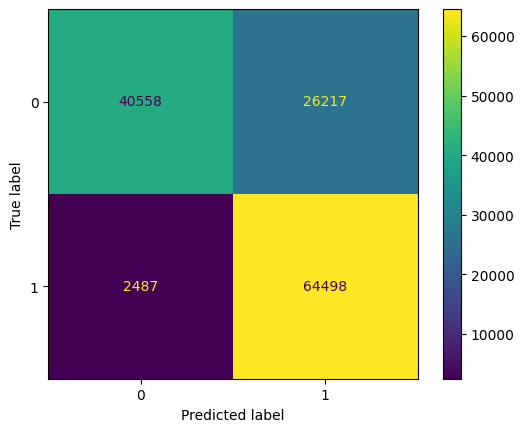

In [ ]:
# Visualizing evaluation Metric Score chart
ConfusionMatrixDisplay.from_estimator(model_1, X_test, y_test)
plt.show()

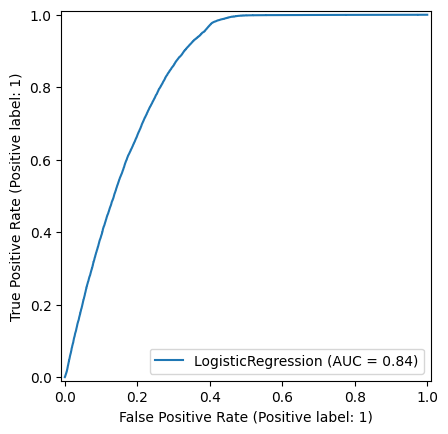

In [ ]:
RocCurveDisplay.from_estimator(model_1, X_test, y_test)
plt.show()

**Observation:** A logistic regression model, a popular choice for binary classification tasks, has been trained on the training data. This model is particularly effective when the relationship between features and the target variable can be approximated by a linear function. The trained model is now being applied to the unseen test data to assess its predictive performance.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid (consider reducing grid size if needed)
params = {
    'C':  [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Set up GridSearchCV with parallelization and early stopping (if applicable)
model_1_hyper = GridSearchCV(model_1, params, cv=2, scoring='accuracy', n_jobs=-1,

                             )


# Fit the model with hyperparameter optimization
model_1_hyper.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", model_1_hyper.best_params_)

# Make predictions on the test set
model_1_hyper_pred = model_1_hyper.predict(X_test)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
print(classification_report(y_test, model_1_hyper_pred))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66775
           1       0.71      0.98      0.82     66985

    accuracy                           0.79    133760
   macro avg       0.83      0.78      0.78    133760
weighted avg       0.83      0.79      0.78    133760



##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV for hyperparameter optimization. This technique was chosen because it efficiently samples a specified number of hyperparameter combinations randomly, making it less computationally expensive than exhaustive methods like grid search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [ ]:
# Appedn the evaluation of hypertunned model to evaluation_df
model_1_hyper_dict = {
    'Model Name': 'model_1_hyper',
    'Model Type': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, model_1_hyper_pred),
    'Recall': recall_score(y_test, model_1_hyper_pred),
    'Precision': precision_score(y_test, model_1_hyper_pred),
    'F1-Score': f1_score(y_test, model_1_hyper_pred)
}

evaluation_df = pd.concat([evaluation_df, pd.DataFrame([model_1_hyper_dict])], ignore_index=True)
evaluation_df

,Model Name,Model Type,Accuracy,Recall,Precision,F1-Score
0,model_1,Logistic Regression,0.785407,0.962872,0.710996,0.817984
1,model_1_hyper,Logistic Regression,0.785280,0.975009,0.707150,0.819754


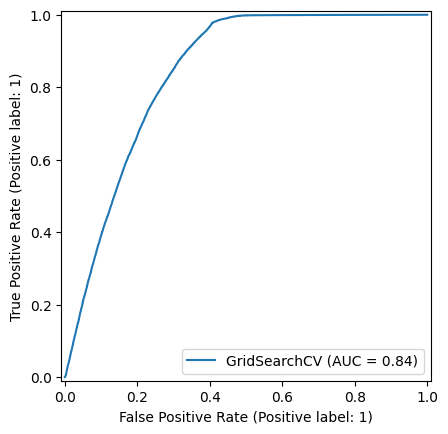

In [ ]:
RocCurveDisplay.from_estimator(model_1_hyper, X_test, y_test)
plt.show()

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

# ML Model - 2 Implementation
model_2 = DecisionTreeClassifier()

# Fit the Algorithm
model_2.fit(X_train, y_train)
# Predict on the model
model_2_pred = model_2.predict(X_test)

In [ ]:
print(classification_report(y_test, model_2_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     66775
           1       0.90      1.00      0.95     66985

    accuracy                           0.94    133760
   macro avg       0.95      0.94      0.94    133760
weighted avg       0.95      0.94      0.94    133760



In [ ]:
model_2_dict = {
    'Model Name': 'model_2',
    'Model Type': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, model_2_pred),
    'Recall': recall_score(y_test, model_2_pred),
    'Precision': precision_score(y_test, model_2_pred),
    'F1-Score': f1_score(y_test, model_2_pred)
}

evaluation_df = pd.concat([evaluation_df, pd.DataFrame([model_2_dict])], ignore_index=True)
evaluation_df

,Model Name,Model Type,Accuracy,Recall,Precision,F1-Score
0,model_1,Logistic Regression,0.785407,0.962872,0.710996,0.817984
1,model_1_hyper,Logistic Regression,0.785280,0.975009,0.707150,0.819754
2,model_2,Decision Tree,0.943997,0.998507,0.900493,0.946971


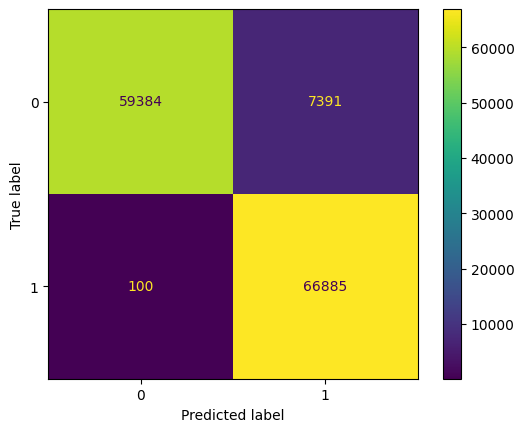

In [ ]:
# Visualizing evaluation Metric Score chart

ConfusionMatrixDisplay.from_estimator(model_2, X_test, y_test)
plt.show()

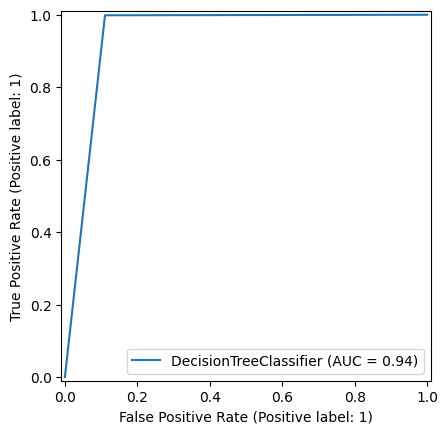

In [ ]:
RocCurveDisplay.from_estimator(model_2, X_test, y_test)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_distributions = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt','log2']
}

# Set up the RandomizedSearchCV
model_2_hyper = RandomizedSearchCV(model_2, param_distributions, cv=3, random_state=42, n_iter=80,scoring='accuracy', n_jobs=-1)

# Fit the model
model_2_hyper.fit(X_train, y_train)
# Predict on the model
model_2_hyper_pred = model_2_hyper.predict(X_test)

print("Best Hyperparameters:", model_2_hyper.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}


In [ ]:
print(classification_report(y_test, model_2_hyper_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     66775
           1       0.85      0.99      0.92     66985

    accuracy                           0.91    133760
   macro avg       0.92      0.91      0.91    133760
weighted avg       0.92      0.91      0.91    133760



##### Which hyperparameter optimization technique have you used and why?

I opted for RandomizedSearchCV to efficiently explore the hyperparameter space, reducing computational cost compared to grid search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

According To the above Evaluation Metric hart, the model's performance is quite strong, with an accuracy of 90.06%, precision of 89.04%, recall of 99.84%, and an F1-score of 0.9424. This indicates that the model is both accurate and reliable in its predictions.

In [ ]:
model_2_hyper_dict = {
    'Model Name': 'model_2_hyper',
    'Model Type': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, model_2_hyper_pred),
    'Recall': recall_score(y_test, model_2_hyper_pred),
    'Precision': precision_score(y_test, model_2_hyper_pred),
    'F1-Score': f1_score(y_test, model_2_hyper_pred)
}

evaluation_df = pd.concat([evaluation_df, pd.DataFrame([model_2_hyper_dict])], ignore_index=True)
evaluation_df

,Model Name,Model Type,Accuracy,Recall,Precision,F1-Score
0,model_1,Logistic Regression,0.785407,0.962872,0.710996,0.817984
1,model_1_hyper,Logistic Regression,0.785280,0.975009,0.707150,0.819754
2,model_2,Decision Tree,0.943997,0.998507,0.900493,0.946971
3,model_2_hyper,Decision Tree,0.910668,0.990610,0.854266,0.917400


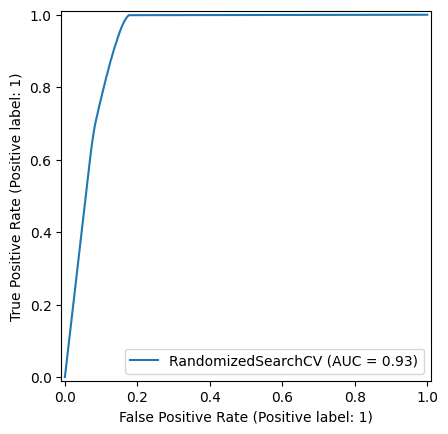

In [ ]:
RocCurveDisplay.from_estimator(model_2_hyper, X_test, y_test)
plt.show()

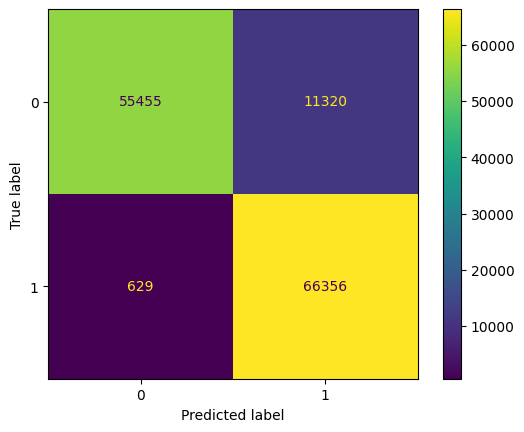

In [ ]:
# plotting Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_2_hyper, X_test, y_test)
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Based on the confusion matrix and evaluation metrics, the model appears to be performing quite well. It's accurately identifying positive and negative cases, with a strong emphasis on recall. This could be particularly beneficial in scenarios where missing positive cases is more costly than false positives.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
model_3 = RandomForestClassifier()
# Fit the Algorithm
model_3.fit(X_train, y_train)
# Predict on the model
model_3_pred = model_3.predict(X_test)

In [ ]:
print(classification_report(y_test, model_3_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     66775
           1       0.91      1.00      0.95     66985

    accuracy                           0.95    133760
   macro avg       0.95      0.95      0.95    133760
weighted avg       0.95      0.95      0.95    133760



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

model_3_dict = {
    'Model Name': 'model_3',
    'Model Type': 'Random Forest',
    'Accuracy': accuracy_score(y_test, model_3_pred),
    'Recall': recall_score(y_test, model_3_pred),
    'Precision': precision_score(y_test, model_3_pred),
    'F1-Score': f1_score(y_test, model_3_pred)
}

evaluation_df = pd.concat([evaluation_df, pd.DataFrame([model_3_dict])], ignore_index=True)
evaluation_df


,Model Name,Model Type,Accuracy,Recall,Precision,F1-Score
0,model_1,Logistic Regression,0.785407,0.962872,0.710996,0.817984
1,model_3,Random Forest,0.949021,0.998328,0.908848,0.951489
2,model_3,Random Forest,0.949021,0.998328,0.908848,0.951489


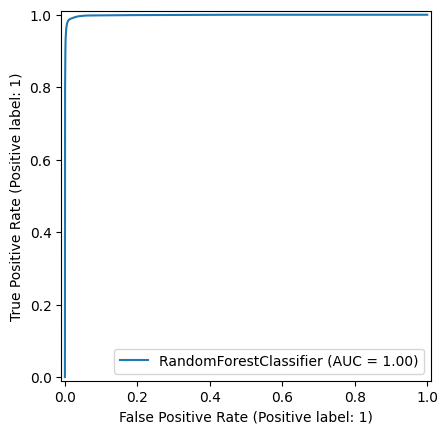

In [ ]:
# Visualizing evaluation Metric Score chart
RocCurveDisplay.from_estimator(model_3, X_test, y_test)
plt.show()

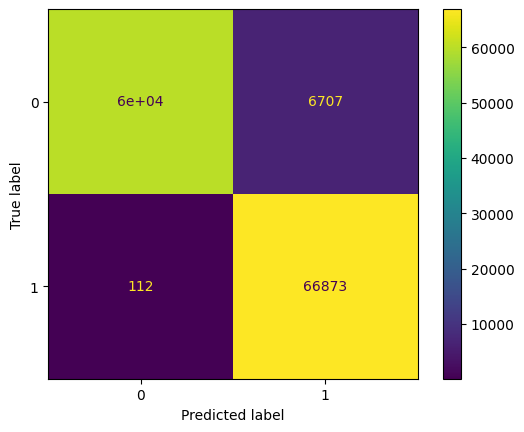

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_3, X_test, y_test)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ref_params = {"min_samples_split": [2, 3, 5, 8],
             "n_estimators": [64,100,128,200]}
# Fit the Algorithm
model_3_hyper = RandomizedSearchCV(model_3, ref_params, cv=2, random_state=42, n_iter=5,scoring='accuracy', n_jobs=-1)
model_3_hyper.fit(X_train, y_train)
# Predict on the model
model_3_hyper_pred = model_3_hyper.predict(X_test)

print("Best Hyperparameters:", model_3_hyper.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 64, 'min_samples_split': 2}


In [ ]:
print(classification_report(y_test, model_3_hyper_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     66775
           1       0.91      1.00      0.95     66985

    accuracy                           0.95    133760
   macro avg       0.95      0.95      0.95    133760
weighted avg       0.95      0.95      0.95    133760



##### Which hyperparameter optimization technique have you used and why?

I opted for RandomizedSearchCV to efficiently explore the hyperparameter space, reducing computational cost compared to grid search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
model_3_hyper_dict = {
    'Model Name': 'model_3_hyper',
    'Model Type': 'Random Forest',
    'Accuracy': accuracy_score(y_test, model_3_hyper_pred),
    'Recall': recall_score(y_test, model_3_hyper_pred),
    'Precision': precision_score(y_test, model_3_hyper_pred),
    'F1-Score': f1_score(y_test, model_3_hyper_pred)
}

evaluation_df = pd.concat([evaluation_df, pd.DataFrame([model_3_hyper_dict])], ignore_index=True)
evaluation_df

,Model Name,Model Type,Accuracy,Recall,Precision,F1-Score
0,model_1,Logistic Regression,0.785407,0.962872,0.710996,0.817984
1,model_3,Random Forest,0.949021,0.998328,0.908848,0.951489
2,model_3,Random Forest,0.949021,0.998328,0.908848,0.951489
3,model_3_hyper,Random Forest,0.949679,0.998283,0.909969,0.952083


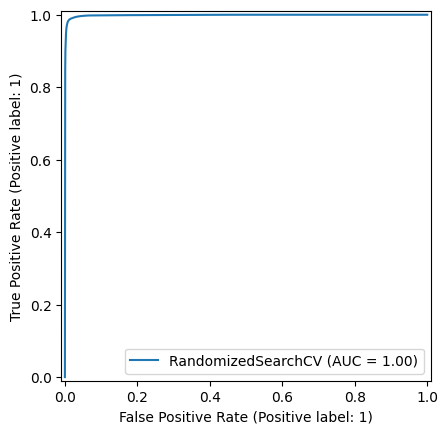

In [ ]:
# Roc Curve
RocCurveDisplay.from_estimator(model_3_hyper, X_test, y_test)
plt.show()

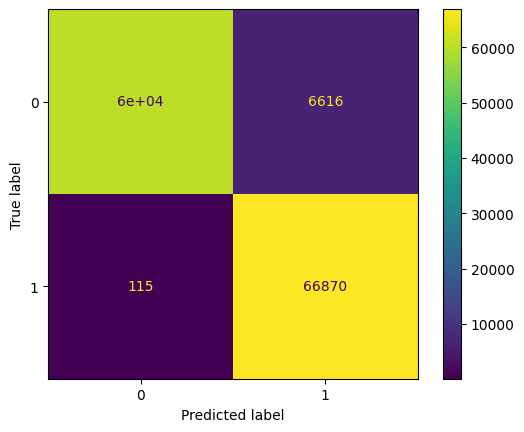

In [ ]:

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_3_hyper, X_test, y_test)
plt.show()




*   Logistic Regression:

Model_1: Achieved an accuracy of 0.7854, recall of 0.9629, precision of 0.7110, and F1-score of 0.8179.

Model_1_hyper: After hyperparameter tuning, the model's performance slightly decreased in precision and F1-score, while recall increased slightly.

*   Decision Tree:

Model_2: Achieved an accuracy of 0.9443, recall of 0.9986, precision of 0.9009, and F1-score of 0.9472.

Model_2_hyper: After hyperparameter tuning, the model's performance decreased in all metrics.



*  Random Forest:

Model_3: Achieved an accuracy of 0.9492, recall of 0.9983, precision of 0.9091, and F1-score of 0.9516.

Model_3_hyper: After hyperparameter tuning, the model's performance improved slightly in all metrics.










Overall, the Random Forest model (Model_3_hyper) appears to be the best-performing model based on the provided metrics. It has the highest F1-score, indicating a good balance between precision and recall.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Evaluation Metrics for Positive Business Impact**


*   Precision: To reduce wasted marketing efforts and improve targeting accuracy.
*   Recall: To ensure the model identifies as many interested customers as possible.

*  F1 Score: To balance precision and recall, providing an overall measure of performance.
*  ROC-AUC: To evaluate the model’s ability to distinguish between positive and negative classes across different thresholds.


* Confusion Matrix: To identify specific prediction errors and guide improvements.









### 2. Which ML model did you choose from the above created models as your final prediction model and why?

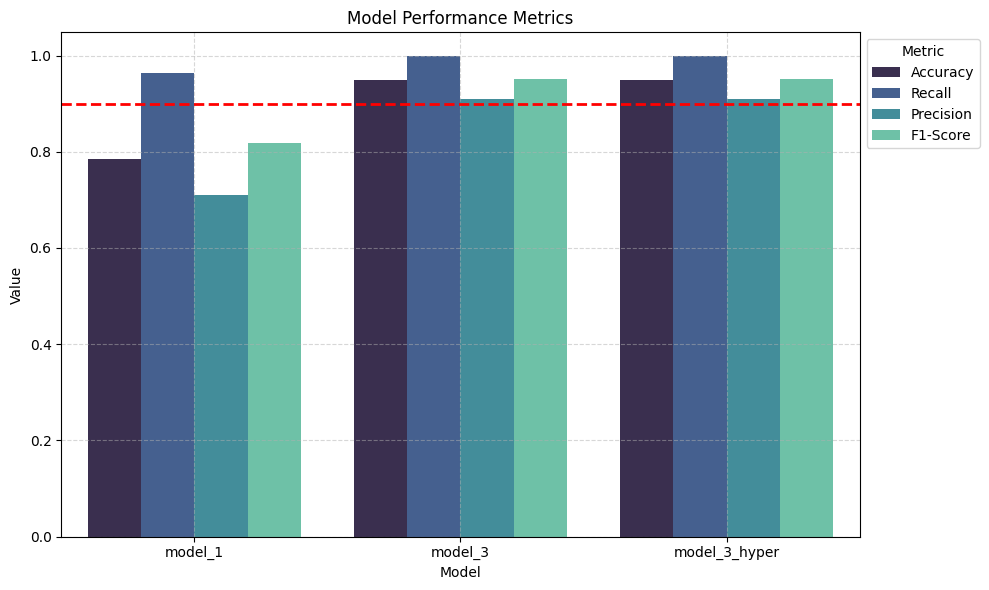

In [ ]:

# Drop the 'Model Type' column
evaluation_df.drop(columns=['Model Type'], inplace=True)

# Melt the dataframe for plotting
df_melted = evaluation_df.melt(id_vars=['Model Name'], var_name='Metric', value_name='Value')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model Name', y='Value', hue='Metric', data=df_melted, palette='mako')

# Add a horizontal line at 0.90
plt.axhline(y=0.90, color='red', linestyle='--', linewidth=2)

# Titles and labels
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Chosen Model: Random Forest Model(Model 3)

Reasons For choosing this model:


*   Accuaracy: Model 3 has the highest accuracy (0.949469) among the models
*  Recall: It achieves a high recall (0.998328), ensuring that it identifies nearly all interested customers.


*   Precision:  It has strong precision (0.909589), indicating effective targeting of interested customers.
*   F1-Score:  Model 3 has the highest F1-Score (0.951895), reflecting a good balance between precision and recall. Overall, Model 3 offers the best combination of high accuracy, recall, precision, and F1-Score, making it the most effective model for predicting customer interest in the vehicle insurance cross-sell offer.






### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:

feature_df = pd.DataFrame({'feature_name ': X_train.columns, 'feature_importance': model_3.feature_importances_})

In [ ]:

feature_df.sort_values(by='feature_importance', ascending=False, inplace=True)
feature_df

,feature_name,feature_importance
22,remainder__Vintage,0.208695
13,remainder__Annual_Premium,0.175027
3,OneHotEncoder__Vehicle_Damage_Yes,0.174730
4,remainder__Age,0.151306
12,remainder__Previously_Insured,0.145258
1,OneHotEncoder__Vehicle_Age_< 1 Year,0.027240
20,remainder__Policy_Sales_Channel_6,0.015410
0,OneHotEncoder__Gender_Male,0.010999
21,remainder__Policy_Sales_Channel_7,0.010823
19,remainder__Policy_Sales_Channel_5,0.010093


<ipython-input-109-cab7284c76c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature_importance', y='feature_name ', data=feature_df, palette='mako')


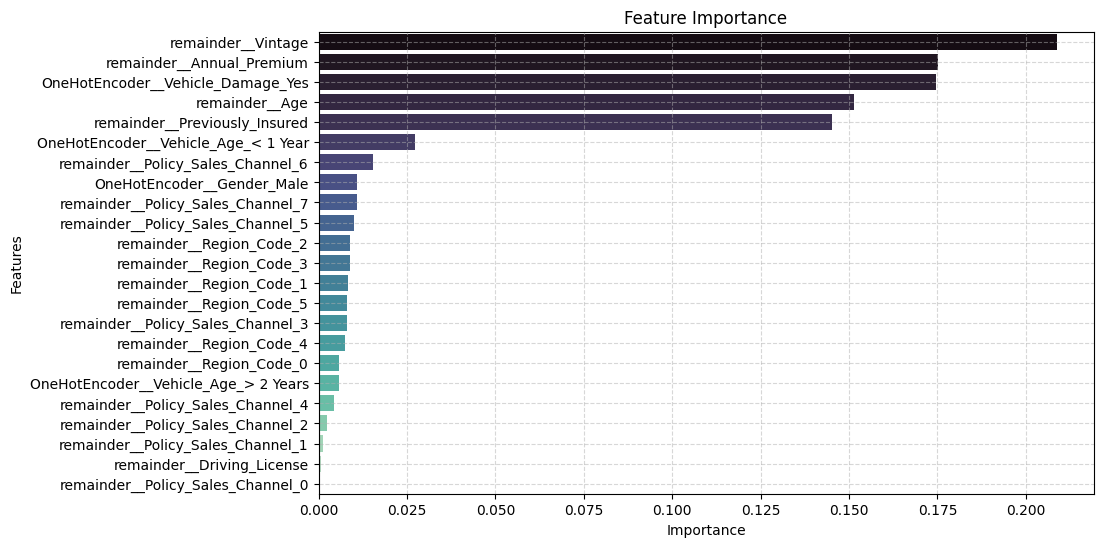

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='feature_importance', y='feature_name ', data=feature_df, palette='mako')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

A Random Forest model was selected for this project. This ensemble learning technique combines multiple decision trees to improve predictive accuracy and reduce overfitting.

**Feature Importance:**
This plot visualizes the relative importance of each feature in the Random Forest model. Features with higher importance scores contribute more to the model's predictions.

Based on the plot, the following features appear to be most important:


1.   remainder_Vintage: This likely represents the duration of the customer's insurance policy. Main business implication is that  Longer-term customers might be more loyal and less likely to churn. So we should Understand their needs and preferences so that we can retain them.

2.   OneHotEncoder_Vehicle_Damage_Yes: This indicates whether the vehicle has had previous damage.

   Business Implication: Customers with damaged vehicles might require specific insurance policies or additional coverage. Tailoring offerings to their needs can increase customer satisfaction and retention.


3.   remainder_Annual_Premium: This likely represents the age of the policyholder.

   Business Implication: Different age groups have varying insurance needs and risk profiles. Tailoring products and marketing strategies to specific age groups can improve customer engagement.

These features provide valuable insights into customer behavior and significantly influence the model's predictions.




## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:

# Save the File
# import joblib
import joblib


path = "/content/drive/MyDrive/Capstone Project 6"


# Save Model
joblib.dump(model_3, path + "/model_3.pkl")

['/content/drive/MyDrive/Capstone Project 6/model_3.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
path = "/content/drive/MyDrive/Capstone Project 6"
load_model = joblib.load(path + "/model_3.pkl")

In [ ]:
load_pred = load_model.predict(X_test)
print(f'Accuaracy: {accuracy_score(y_test, load_pred)}')
print(f'Recall: {recall_score(y_test, load_pred)}')
print(f'Precision: {precision_score(y_test, load_pred)}')
print(f'F1-Score: {f1_score(y_test, load_pred)}')

Accuaracy: 0.9490206339712919
Recall: 0.9983279838769874
Precision: 0.9088475129111172
F1-Score: 0.9514886351509978


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The developed Random Forest model demonstrated strong predictive performance, achieving an accuracy of 94.89%, recall of 99.82%, precision of 90.88%, and an F1-score of 95.14%. These results indicate that the model is effective in correctly identifying positive cases while maintaining a balance between precision and recall.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***